In [78]:
import pandas as pd
import numpy as np
import bcrypt
from pymongo import MongoClient
import ssl
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

  ## Importing the dataset 

In [9]:
data=pd.read_csv('merged_df.csv')

In [10]:
data.drop(['Unnamed: 0','_id','password','Timestamp'],axis=1,inplace=True)

In [11]:
data

,Name,Email,profession,interest,collaboration,Topic,Skills,Experience
0,Deependar,deependar37@gmail.com,Student,Projects,"Student, Faculty",Structures,Structural analysis.,3.0
1,Devanshi Vora,devanshi.v11@gmail.com,Student,Projects,"Student, Faculty, Researcher",AI & ML,Mainly necessary coding languages and web deve...,3.0
2,Hamsini .R,hamsini.ramanan@gmail.com,Student,"Projects, Research","Student, Faculty, Researcher",NLP,"Data Analytics , AI , Tensorflow",4.0
3,Zenha,zenhaiqbal@gmail.com,Student,Study Groups,Student,Literature,"English poetry, prose, fiction",5.0
4,Jothi,jothithangu@gmail.com,Faculty,Projects,Faculty,Data management,Mechanical Design,12.0
...,...,...,...,...,...,...,...,...
572,Tyler Rojas,tyler.rojas@university.edu,Researcher,Projects,Researcher,Robotics and Sensors,"Drug development, bioinformatics with R progra...",3.0
573,Sierra Zhang,sierra.zhang@university.edu,Faculty,Study groups,Researcher,Human-Computer Interaction,"HTML,ReactJS, DL, ml, dl, app dev, ml, dl, app...",18.0
574,Joshua Hughes,joshua.hughes@university.edu,Researcher,Projects,Researcher,Sustainable Computing,Web development\nBioinformatics tools\nMarketi...,5.0
575,Jeffery Hammond,jeffery.hammond@example.com,Student,Projects,Student,Cybersecurity,"Software Testing, C, C++, Python, Java, HTML, ...",1.0


## Data pre-processing

In [20]:
# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/casarulez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#Listing out stopwords in english
x=stopwords.words('english')

In [22]:
lemma = WordNetLemmatizer()

In [25]:
# Download required NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

def general_preprocess(to_preprocess_column_name, df_name):
    to_preprocess_column_name_processed = []
    lemma = WordNetLemmatizer()
    
    for i in range(len(df_name)):
        col = df_name.iloc[i][to_preprocess_column_name]
        col = re.sub('[^a-zA-Z]', ' ', col)  # Remove non-alphabetic characters
        col = col.lower()  # Convert to lowercase
        col = col.split()  # Split into words
        col = [lemma.lemmatize(word) for word in col if word not in set(stopwords.words('english'))]  # Lemmatize and remove stopwords
        col = ' '.join(col)  # Join words back into a single string
        to_preprocess_column_name_processed.append(col)
    
    return to_preprocess_column_name_processed

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/casarulez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/casarulez/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
Topic_preprocessed=general_preprocess('Topic',data)

In [27]:
Topic_preprocessed

['structure',
 'ai ml',
 'nlp',
 'literature',
 'data management',
 'aiml ui design',
 'machine learning deep learning',
 'biotechnology',
 'machine learning deep learning quantitative analysis',
 'vlsi microprocessor microcontrollers arduino rtl designing antenna designing communication',
 'robotics sensor',
 'data science',
 'ai ml cloud computing',
 'cyber security software development cloud application',
 'probablity theory combinatorics machine learning statistic competitive programming',
 'machine learning',
 'electronics robotics',
 'cybersecurity cloud computing',
 'ml',
 'anything',
 'game',
 'cricket',
 'artificial intelligence machine learning',
 'web development',
 'strategic management',
 'artificial intelligence',
 'hybrid engine anything related mechatronics engineering',
 'finance technology',
 'ar vr',
 'aiml devops mlops web dev',
 'c',
 'nlp finance staristical mathematics',
 'ai',
 'aws ui ux design',
 'cyber security ethical hacking',
 'cyber security',
 'anything 

In [28]:
Skills_preprocessed=general_preprocess('Skills',data)

In [29]:
Skills_preprocessed

['structural analysis',
 'mainly necessary coding language web development',
 'data analytics ai tensorflow',
 'english poetry prose fiction',
 'mechanical design',
 'ui',
 'machine learning neural network enterpreneurship communication',
 'sport analysis basic genomics knowledge',
 'ml dl python c c java statistic vector',
 'verilog coding arduino coding coding',
 'arduino ide ro fusion',
 'data management large industry',
 'java python c c html cs',
 'internship experience vapt project work python javascript framework research experience malware analysis open source contribution international organization',
 'probability combinatorics python',
 'ml data analysis',
 'iot pcb designing arduino programming basic linux',
 'skilled',
 'cloud computing',
 'verbal marketing',
 'c',
 'law',
 'artificial intelligence research basic computer science student',
 'front end dev basic ui ux design basic back end knowledge',
 'accountancy fm sm',
 'android developer',
 'design problem solving exten

## Combining target columns 

In [80]:
df_preprocessed = pd.DataFrame({
    'Skills': Skills_preprocessed,
    'Topic': Topic_preprocessed
})

In [81]:
df['Combined'] = df['Skills'] + ', ' + df['Topic']

# Drop the individual columns if you only need the combined column
df_combined = df.drop(columns=['Skills', 'Topic'])

In [82]:
df_combined

,Combined
0,"structural analysis, structure"
1,mainly necessary coding language web developme...
2,"data analytics ai tensorflow, nlp"
3,"english poetry prose fiction, literature"
4,"mechanical design, data management"
...,...
572,drug development bioinformatics r programming ...
573,html reactjs dl ml dl app dev ml dl app dev ml...
574,web development nbioinformatics tool nmarketin...
575,software testing c c python java html cs sql a...


## TF-IDF

In [84]:
train_data=df_combined['Combined']

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_data)

cosine_sim_matrix = cosine_similarity(tfidf_matrix)


In [86]:
cosine_sim_matrix.shape

(577, 577)

## Affinity clustering 

Affinity Propagation is a clustering algorithm that does not require the number of clusters to be specified in advance. It works by passing messages between data points to identify clusters of similar items(similarity matrix)

In [88]:
from sklearn.cluster import AffinityPropagation
# Step 3: Apply Affinity Propagation
affinity_propagation = AffinityPropagation(affinity='precomputed', random_state=42)
labels = affinity_propagation.fit_predict(cosine_sim_matrix)

# Step 4: Create a DataFrame to view results
df = pd.DataFrame({'Skillset': train_data, 'Cluster': labels})

# Print the DataFrame with clusters
print("Clustered Skillsets with Affinity Propagation:")
print(df)

# Print the number of items in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of Items in Each Cluster:")
print(cluster_counts)

Clustered Skillsets with Affinity Propagation:
                                              Skillset  Cluster
0                       structural analysis, structure        9
1    mainly necessary coding language web developme...      102
2                    data analytics ai tensorflow, nlp       44
3             english poetry prose fiction, literature       63
4                   mechanical design, data management       31
..                                                 ...      ...
572  drug development bioinformatics r programming ...       96
573  html reactjs dl ml dl app dev ml dl app dev ml...        7
574  web development nbioinformatics tool nmarketin...      101
575  software testing c c python java html cs sql a...      101
576  human computer interaction digital design nfor...       65

[577 rows x 2 columns]

Number of Items in Each Cluster:
Cluster
0       2
1       2
2       8
3      10
4       8
       ..
100     3
101     7
102     6
103     8
104     3
Name: cou

In [89]:
#Printing the number of data in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of Items in Each Cluster:")
print(cluster_counts)


Number of Items in Each Cluster:
Cluster
0       2
1       2
2       8
3      10
4       8
       ..
100     3
101     7
102     6
103     8
104     3
Name: count, Length: 105, dtype: int64


## dimensionality r(TSNE) reduction and visualizing

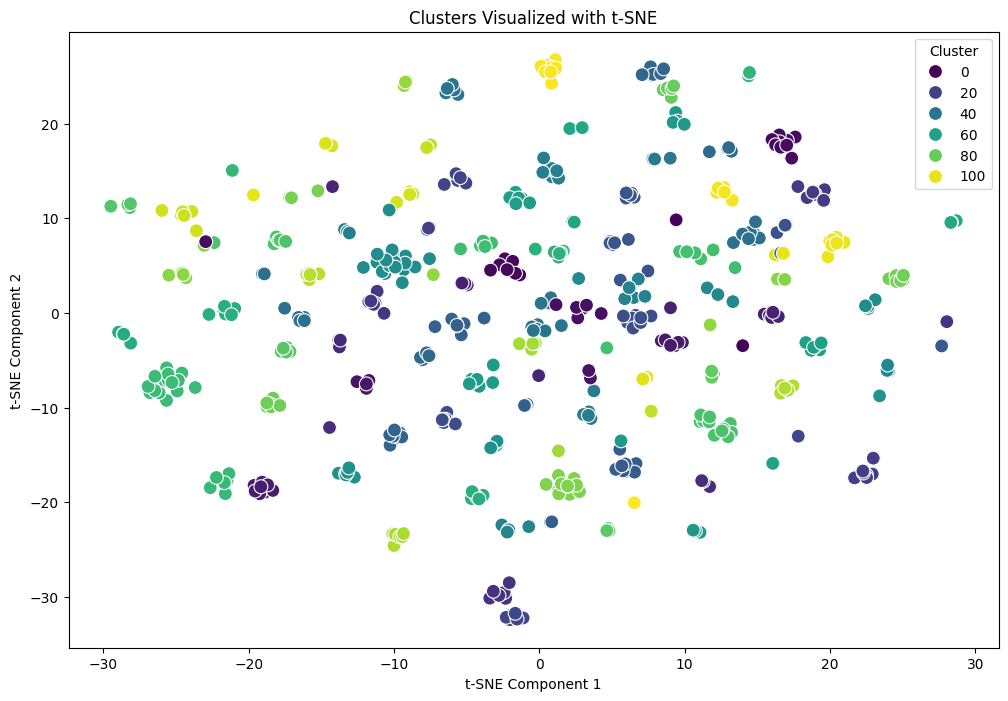

In [260]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_matrix = tsne.fit_transform(tfidf_matrix.toarray())

# Add t-SNE results to DataFrame
df_tsne = pd.DataFrame(reduced_matrix, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', marker='o', s=100)
plt.title('Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.savefig('tf_idf_cluster.png', dpi=600, bbox_inches='tight')
plt.show()

In [257]:
plt.tight_layout()  # Automatically adjusts subplot parameters to give specified padding

# Save the plot with 600 DPI resolution
plt.savefig('tf_idf_cluster.png', dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Checking specific cluster values and their data manually

In [91]:
cluster_df = df[df['Cluster'] == 30]

In [92]:
cluster_df

,Skillset,Cluster
17,"skilled, cybersecurity cloud computing",30
18,"cloud computing, ml",30
92,mern stack spring boot java cloud computing cl...,30
147,ai ml data science cloud computing cloud compu...,30
163,scientific computing scientific computing scie...,30
169,ml dl python c c java statistic vector scienti...,30
186,scientific computing cloud computing cloud com...,30
408,geospatial analysis cloud computing cloud comp...,30
443,cognitive science cloud computing cloud comput...,30
541,iot cloud computing cloud computing cloud comp...,30


## Intra cluster similarities 

In [268]:
# Initialize a list to hold intra-cluster similarities
intra_cluster_similarities = []

# Get unique cluster labels
unique_clusters = np.unique(labels)

for cluster in unique_clusters:
    # Get the indices of the data points in the current cluster
    cluster_indices = np.where(labels == cluster)[0]
    
    if len(cluster_indices) > 1:  # Only compute if more than one point
        # Extract the TF-IDF matrix for the current cluster
        cluster_tfidf_matrix = tfidf_matrix[cluster_indices]
        
        # Compute the cosine similarity matrix for the current cluster
        cluster_sim_matrix = cosine_similarity(cluster_tfidf_matrix)
        
        # Get the number of points in the cluster
        num_points = len(cluster_indices)
        
        # Compute the average similarity within the cluster
        # Exclude the diagonal (self-similarity) from the average
        avg_similarity = (np.sum(cluster_sim_matrix) - num_points) / (num_points * (num_points - 1))
        
        intra_cluster_similarities.append(avg_similarity)
    else:
        # Not enough points to calculate
        intra_cluster_similarities.append(np.nan)

# Calculate the overall intra-cluster similarity
# Filter out NaN values (clusters with only one point)
valid_similarities = [sim for sim in intra_cluster_similarities if not np.isnan(sim)]
overall_intra_cluster_similarity = np.mean(valid_similarities) if valid_similarities else np.nan

# Print the overall intra-cluster similarity
print(f"\nOverall Intra-Cluster Similarity: {overall_intra_cluster_similarity:.4f}")


Overall Intra-Cluster Similarity: 0.7430


## Silhouette Score

In [270]:
from sklearn.metrics import silhouette_score

# Assuming `embeddings` is your feature matrix and `labels` are your cluster labels
silhouette_avg = silhouette_score(tfidf_matrix, labels)

# Print the Silhouette Score
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.3876


In [275]:
from sklearn.metrics import davies_bouldin_score

# Convert sparse matrix to dense
tfidf_dense = tfidf_matrix.toarray()

# Compute the Davies-Bouldin Index
dbi = davies_bouldin_score(tfidf_dense, labels)

# Print the Davies-Bouldin Index
print(f"Davies-Bouldin Index: {dbi:.4f}")


Davies-Bouldin Index: 1.0342


In [285]:
data['Combined'] = df['Skillset']

In [287]:
data['Cluster']=df['Cluster']

In [288]:
data

,Name,Email,profession,interest,collaboration,Topic,Skills,Experience,Combined,Cluster
0,Deependar,deependar37@gmail.com,Student,Projects,"Student, Faculty",Structures,Structural analysis.,3.0,"structural analysis, structure",9
1,Devanshi Vora,devanshi.v11@gmail.com,Student,Projects,"Student, Faculty, Researcher",AI & ML,Mainly necessary coding languages and web deve...,3.0,mainly necessary coding language web developme...,102
2,Hamsini .R,hamsini.ramanan@gmail.com,Student,"Projects, Research","Student, Faculty, Researcher",NLP,"Data Analytics , AI , Tensorflow",4.0,"data analytics ai tensorflow, nlp",44
3,Zenha,zenhaiqbal@gmail.com,Student,Study Groups,Student,Literature,"English poetry, prose, fiction",5.0,"english poetry prose fiction, literature",63
4,Jothi,jothithangu@gmail.com,Faculty,Projects,Faculty,Data management,Mechanical Design,12.0,"mechanical design, data management",31
...,...,...,...,...,...,...,...,...,...,...
572,Tyler Rojas,tyler.rojas@university.edu,Researcher,Projects,Researcher,Robotics and Sensors,"Drug development, bioinformatics with R progra...",3.0,drug development bioinformatics r programming ...,96
573,Sierra Zhang,sierra.zhang@university.edu,Faculty,Study groups,Researcher,Human-Computer Interaction,"HTML,ReactJS, DL, ml, dl, app dev, ml, dl, app...",18.0,html reactjs dl ml dl app dev ml dl app dev ml...,7
574,Joshua Hughes,joshua.hughes@university.edu,Researcher,Projects,Researcher,Sustainable Computing,Web development\nBioinformatics tools\nMarketi...,5.0,web development nbioinformatics tool nmarketin...,101
575,Jeffery Hammond,jeffery.hammond@example.com,Student,Projects,Student,Cybersecurity,"Software Testing, C, C++, Python, Java, HTML, ...",1.0,software testing c c python java html cs sql a...,101


## Recommendation function 

In [303]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_profiles_by_topic_skills(user_index, df, top_n=5):
    """
    Recommends the top N profiles to a target profile based on 'Topic' and 'Skills' columns.

    Parameters:
    - user_index (int): The index of the target profile in the DataFrame.
    - df (pandas.DataFrame): The DataFrame containing profile data.
    - top_n (int): The number of top profiles to recommend.

    Returns:
    - list of tuples: Each tuple contains the index and similarity score of a recommended profile.
    """
    # Combine 'Topic' and 'Skills' into a single text representation for each profile
    
    # Create a TF-IDF vectorizer and transform the combined text data
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(data['Combined'])
    
    # Get the TF-IDF vector for the target profile
    target_vector = tfidf_matrix[user_index]
    
    # Compute cosine similarities between the target profile and all other profiles
    similarities = cosine_similarity(target_vector, tfidf_matrix).flatten()
    
    # Exclude the target profile itself by setting its similarity score to -1
    similarities[user_index] = -1
    
    # Get the indices of the top N most similar profiles
    top_indices = similarities.argsort()[-top_n:][::-1]
    
    # Create a list of tuples with index and similarity score
    recommendations = [(idx, similarities[idx]) for idx in top_indices]
    
    return recommendations

def print_profile_details(profile_index, df):
    """
    Prints the details of a specific profile.

    Parameters:
    - profile_index (int): The index of the profile in the DataFrame.
    - df (pandas.DataFrame): The DataFrame containing profile data.
    """
    profile_details = df.iloc[profile_index]
    print(f"Details of Target Profile (Index: {profile_index}):")
    print(f"Name: {profile_details['Name']}")
    print(f"Email: {profile_details['Email']}")
    print(f"Skills: {profile_details['Skills']}")
    print(f"Domain Interest: {profile_details['Topic']}")
    print(f"Cluster: {profile_details['Cluster']}")
    print("-" * 40)


def print_recommendation_details(recommendations, df):
    """
    Prints the details of the recommended profiles.

    Parameters:
    - recommendations (list of tuples): Each tuple contains the index and similarity score of a recommended profile.
    - df (pandas.DataFrame): The DataFrame containing profile data.
    """
    for idx, score in recommendations:
        profile_details = data.iloc[idx]
        print(f"Index: {idx}")
        print(f"Similarity Score: {score:.4f}")
        print(f"Name: {profile_details['Name']}")
        print(f"Email: {profile_details['Email']}")
        print(f"Skills: {profile_details['Skills']}")
        print(f"Domain Interest: {profile_details['Topic']}")
        print(f"Cluster: {profile_details['Cluster']}")
        print("-" * 40)
        
target_profile_index = 575  # Replace with the index of the target profile
print_profile_details(target_profile_index, data)
top_n_recommendations = recommend_profiles_by_topic_skills(target_profile_index, data, top_n=5)
print_recommendation_details(top_n_recommendations, data)


Details of Target Profile (Index: 575):
Name: Jeffery Hammond
Email: jeffery.hammond@example.com
Skills: Software Testing, C, C++, Python, Java, HTML, CSS, SQL, AWS, Figma , FlutterFlow, Canva, Adobe XD., C, C++, Python, Java, HTML, CSS, SQL, AWS, Figma , FlutterFlow, Canva, Adobe XD., C, C++, Python, Java, HTML, CSS, SQL, AWS, Figma , FlutterFlow, Canva, Adobe XD.
Domain Interest: Cybersecurity
Cluster: 101
----------------------------------------
Index: 554
Similarity Score: 0.9803
Name: Joan Evans
Email: joan.evans@university.edu
Skills: ai ml, C, C++, Python, Java, HTML, CSS, SQL, AWS, Figma , FlutterFlow, Canva, Adobe XD., C, C++, Python, Java, HTML, CSS, SQL, AWS, Figma , FlutterFlow, Canva, Adobe XD., C, C++, Python, Java, HTML, CSS, SQL, AWS, Figma , FlutterFlow, Canva, Adobe XD.
Domain Interest: nlp
Cluster: 101
----------------------------------------
Index: 538
Similarity Score: 0.9714
Name: Gregory Williamson
Email: gregory.williamson@example.com
Skills: Data Mining, C, C++